## Quantified Self : Analyzing Personal Garmin Data (2012-2017)

## Anuj Katiyal (ak3979)

### Insights into my fitness journey over the last 5 years

I have been an avid runner for the past 4 years, and what has been a fun part of all those is how much we can learn about ourselves from exploring the data we capture.

I started capturing data about myself around the year 2012, which was when we saw the advent of wearable devices, and have always wanted to carry out an analysis to gain insights about my running patterns, my strength training schedules, my diet logs and any other metadata which I can collect about myself like the Heart Rate, Cadence for runs and also the step counts.

About **[Quantified Self](http://quantifiedself.com/)** : When learning about the ways to explore about the data you capture, I came across the term Quantified Self and have been following the blog ever since. Its just amazing how capturing and analyzing data about yourself can actually help me make data driven decision to improve your lifestyle and so many people are joining this movement and bringing a data-driven change for improving their lives.

** Questions which I would like to answer in my project analysis are as follows : **

* How much time have I spent on various activities like Running, Treadmill Running, Strength Training Sessions, Cycling and Cardio Sessions?
* How many calories have I burnt in total for every activity and see any trends for the time spent on an activity with calories burnt?
* An activity time vs calorie analysis for every specific activity type, which can help me make better decisions for choosing an activity based on the time I have?
* What is the time of the day that I usually do the activities and how has it changed over the past 5 years? It will help me relive the changes that have happened in my life and how they have affected my schedules.
* How does the running mileage change for the marathon seasons, as compared to off-season when we are mostly getting the body into the best shape for the running season?
* Analyzing trends about all the long distance runs (>15 kms), specifically, the average speed during the runs, the average heart rate etc.
* Which particular year has been the most exhaustive in terms of the calories burnt, the number of miles run, and the amount of time I did some physical activity?

I do take inspiration from the [Quantified Self Running archives](http://quantifiedself.com/running/) and will try and do an analysis on all these aspects about my data.

** Where the reader can find the data? **
I would like to share the data captured about all my activities if someone wants to analyze it, but as the data is about myself, I would probably not share it on a public platform. You can always mail me to get the data at ** `anujk3@gmail.com` **.

** Team ** : I will be working on my dataset and gaining insights through the analysis I do.

### Languages Used : 

Something I am really passionate about is doing data analysis work and Python has been my go to language for it. Through the course Exploratory Data Analysis and Visualizations, Prof. Joyce Robbins did help me realize how even `R` can help in quickly analyzing the data and actually the best part about `R` for me was getting to learn about `ggplot`. 

I still prefer using Python as my language for data analysis but hacked my way to use ggplot within the Python Analysis and will be doing most of my dataframe analysis in `Python` and making plots with `ggplot`, but all within a `Python Notebook`.

I will also be working on interactive visualizations using `D3.js` and whenever possible `matplotlib within Python`.

## Exploratory Data Analysis

### Import Statements and load Data

In [1]:
import pandas as pd
import warnings
import numpy as np
from rpy2.robjects import pandas2ri
pandas2ri.activate()
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
%reload_ext rpy2.ipython
%matplotlib inline
pd.options.display.max_rows = 999

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;

    }
</style>
""")

### Load Data

In [3]:
path = "data/a"

frame = pd.DataFrame()
list_ = []

for i in range(1, 27):
    file_path = path + str(i)+ ".csv"
    #print(file_path)
    df = pd.read_csv(file_path, index_col=None, header=0, skiprows=2)
    list_.append(df)
    frame = pd.concat(list_)
    
frame.reset_index(inplace=True)
frame.drop("index", axis=1, inplace=True)
frame.drop(" Favorite", axis=1, inplace=True)
frame.drop("Unnamed: 11", axis=1, inplace=True)

In [4]:
#frame.columns

In [5]:
col_names = ['activityType', 'startTime', 'activityTime', 'actDistance', 'elevationGain', 'avgSpeed', 'avgHR', 'maxHR', 
            'steps', 'calories']
frame.columns = col_names

### Data Cleaning

** Ignore the swimming activity, only 1 row **


In [6]:
frame.drop(450, axis=0, inplace=True)

** Convert Elliptical to Cardio **

In [7]:
frame[frame["activityType"] == "Elliptical"]
frame.loc[384, "activityType"] = "Cardio"

** Ignore Walking as an activity **

In [8]:
frame.drop(frame[frame["activityType"] == "Walking"].index, axis=0, inplace=True)

** Ignore swimming as an activity as only 3 recorded activities **

In [9]:
frame[frame["activityType"] == "Lap Swimming"].index
frame.drop(frame[frame["activityType"] == "Lap Swimming"].index, axis=0, inplace=True)

** Activity type Strength Training was recording as Others in older Garmin Devices **

In [10]:
frame.drop([214, 221, 223, 242], axis=0, inplace=True)
frame.activityType = frame.activityType.str.replace("Other", "Strength Training")

** Activity Types Indoor Rowing and Indoor Cycling also included as Cardio **

In [11]:
frame.activityType = frame.activityType.str.replace("Indoor Rowing", "Cardio")
frame.activityType = frame.activityType.str.replace("Indoor Cycling", "Cardio")

** Correcting Data Errors and Data Types **

In [12]:
frame.loc[frame["activityType"] == "Strength Training", "actDistance"] = np.NaN
frame.loc[frame["activityType"] == "Strength Training", "elevationGain"] = np.NaN
frame.loc[frame["activityType"] == "Strength Training", "avgSpeed"] = np.NaN
frame.loc[frame["activityType"] == "Strength Training", "steps"] = np.NaN
frame.loc[frame["activityType"] == "Cardio", "actDistance"] = np.NaN
frame.loc[frame["activityType"] == "Cardio", "elevationGain"] = np.NaN
frame.loc[frame["activityType"] == "Cardio", "avgSpeed"] = np.NaN
frame.loc[frame["activityType"] == "Cardio", "steps"] = np.NaN

In [13]:
frame["avgHR"] = frame["avgHR"].replace(['--', '0'], np.NaN)
frame["maxHR"] = frame["maxHR"].replace(['--', '0'], np.NaN)
frame["steps"] = frame["steps"].replace(['--', '0'], np.NaN)
frame["steps"] = frame.steps.str.replace(",", "")
frame['avgHR'] = frame.avgHR.astype(float)
frame['maxHR'] = frame.maxHR.astype(float)
frame['steps'] = frame.steps.astype(float)

In [14]:
frame["elevationGain"] = frame["elevationGain"].replace(['--', '0', 0], np.NaN)
frame.loc[[456, 495], "elevationGain"] = 328
frame["elevationGain"] = frame.elevationGain.str.replace(",", "")
frame['elevationGain'] = frame.elevationGain.astype(float)
frame["avgSpeed"] = frame.avgSpeed.str.replace(":", ".")
frame["avgSpeed"] = frame.avgSpeed.str.replace("--.--", '0.0')
frame['avgSpeed'] = frame.avgSpeed.astype(float)
frame['actDistance'] = frame.actDistance.astype(float)
frame["calories"] = frame.calories.apply(lambda x: str(x).replace(",", ""))
frame['calories'] = frame.calories.astype(float)

In [15]:
frame.drop(frame[frame["actDistance"] < 0.01].index, axis=0, inplace=True)
frame.reset_index(inplace=True)
frame.drop("index", axis=1, inplace=True)

In [17]:
running_data = frame.copy()
running_data.to_csv("final_data.csv")

### Exploring the data and the datatypes

** Initial Peek into the data **

In [18]:
running_data.head()

,activityType,startTime,activityTime,actDistance,elevationGain,avgSpeed,avgHR,maxHR,steps,calories
0,Strength Training,"Thu, 6 Apr 2017 10:43 PM",1:09:02,NaN,NaN,NaN,119.0,163.0,NaN,597.0
1,Strength Training,"Tue, 4 Apr 2017 10:36 PM",54:37,NaN,NaN,NaN,117.0,155.0,NaN,474.0
2,Strength Training,"Sun, 2 Apr 2017 10:46 PM",1:12:20,NaN,NaN,NaN,116.0,159.0,NaN,601.0
3,Strength Training,"Tue, 28 Mar 2017 11:02 PM",42:11,NaN,NaN,NaN,99.0,142.0,NaN,257.0
4,Strength Training,"Mon, 27 Mar 2017 11:17 PM",45:42,NaN,NaN,NaN,120.0,165.0,NaN,412.0


### Data Transformations

** Converting startTime to Python DateTime Format to use the inbuilt functions **

In [170]:
running_data["startTime"] = pd.to_datetime(running_data["startTime"])
#running_data.head()

** Concatenating information about the Month and Year for every activity to the DataFrame **

In [171]:
running_data["activityMonth"] = running_data.startTime.dt.month
running_data["activityDay"] = running_data.startTime.dt.dayofweek

In [172]:
running_data["activityMonthName"] = running_data.activityMonth.map({1:"January", 2:"February", 3:"March", 4:"April",
                                                                   5:"May", 6:"June", 7:"July", 8:"August", 
                                                                   9:"September", 10:"October", 11:"November", 12:"December"})

In [173]:
running_data["activityDayName"] = running_data.activityDay.map({0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday",
                                                                   4:"Friday", 5:"Saturday", 6:"Sunday"})

In [174]:
#running_data.head()

** Calculating total minutes of an activity from the data **

In [175]:
def getMinutes(activityTime):
    curr_time = activityTime.split(":")
    if len(curr_time) == 2:
        final_time = curr_time[0] + "." + curr_time[1]
    else:
#         print curr_time
        mins = int(curr_time[0])*60 + int(curr_time[1])
        final_time = str(mins) + "." + curr_time[2]
    return final_time

In [176]:
running_data["activityMins"] = running_data.activityTime.apply(getMinutes)
running_data["activityMins"] = running_data["activityMins"].astype("float")

In [177]:
running_data.drop("activityTime", axis=1, inplace=True)
#running_data.head()

** Checking final data types **

In [178]:
running_data.dtypes

activityType                 object
startTime            datetime64[ns]
actDistance                 float64
elevationGain               float64
avgSpeed                    float64
avgHR                       float64
maxHR                       float64
steps                       float64
calories                    float64
activityMonth                 int64
activityDay                   int64
activityMonthName            object
activityDayName              object
activityMins                float64
dtype: object

## Initial Analysis of Data : Continuous Variables 

### MISSING VALUES 

In [179]:
running_data.describe()

,actDistance,elevationGain,avgSpeed,avgHR,maxHR,steps,calories,activityMonth,activityDay,activityMins
count,211.000000,80.000000,211.000000,336.000000,336.000000,82.000000,494.000000,494.000000,494.000000,494.000000
mean,5.018436,208.725000,9.970711,123.291667,157.639881,8519.463415,585.524291,6.447368,3.192308,63.260020
std,4.160373,284.234659,3.127073,17.777179,14.814820,8494.509896,455.932193,3.712304,2.070135,42.252763
min,0.240000,3.000000,0.000000,77.000000,81.000000,404.000000,0.000000,1.000000,0.000000,1.270000
25%,2.470000,51.500000,8.580000,111.000000,150.000000,3783.500000,244.500000,3.000000,1.000000,28.437500
50%,3.550000,112.500000,9.470000,121.000000,159.000000,4753.000000,482.500000,7.000000,3.000000,58.560000
75%,6.300000,257.500000,11.005000,135.000000,168.000000,9205.000000,816.500000,10.000000,5.000000,91.367500
max,26.340000,1943.000000,43.370000,168.000000,188.000000,42808.000000,3362.000000,12.000000,6.000000,280.590000


** Looking at the count of values for all the continuous variables, we observe that out of 494 activities, 211 activities had distance recorded, 80 activities had elevationGains recorded, the average speed was recorded for 211 activities, with average and max Heart Rate being recorded for 336 activities. **

** Calories, Activity Month, Activity Day and the Activity Minutes were recorded for all the activities **

Some of the reasons for missing data : 

1. During the span of 5 years, I have changed 4 wearable devices. Initially I used the Garmin Vivofit tracker for all the runs, which did not have heart rate tracker. 
2. After that I bought the Garmin Forerunner 920 (GPS inbuilt), which had a heart rate strap along with it and it also used to calculate the elevationGain and many more parameters for all the runs. But I do realize that I was lazy to use the heart rate strap as it needed to be washed after every run.
3. After that I used the Garmin Vivofit2 tracker, which had inbuilt heart rate monitor but lacked GPS, so the runs were still being tracked by Garmin Forerunner 920 and whenever were tracked using Vivofit2, lacked heart rate information.
4. Currently I am using the Garmin Vivoactive HR, which has an wrist HR monitor as well as an inbuilt GPS, but being in Graduate School, the frequency of runs has gone down significantly.

** All the variables in the analysis are important but lets do an initial missing data analysis with visualizations **

** *Visualization : Missing Data 1* **

In [180]:
running_data_continuous = running_data[running_data.describe().columns].copy()

NOTE: The following pairs of variables appear to have the same missingness pattern.
 Please verify whether they are in fact logically distinct variables.
     [,1]    [,2]   
[1,] "avgHR" "maxHR"


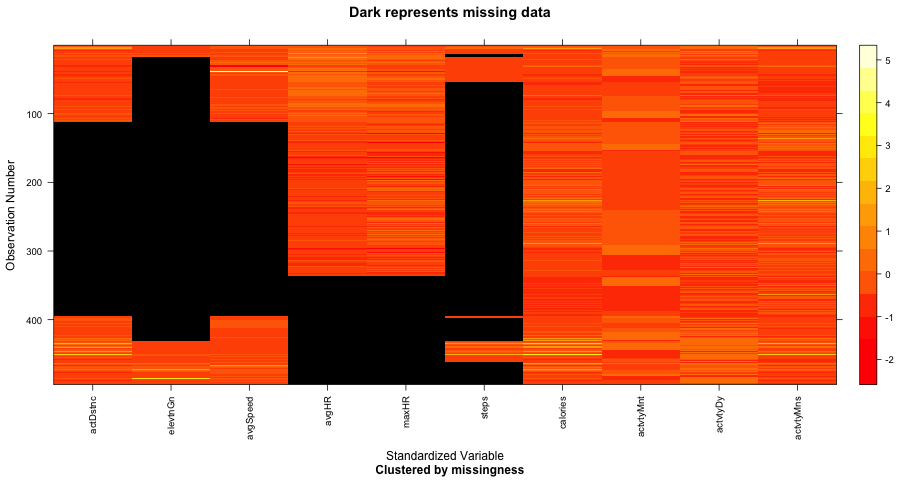

In [181]:
%%R -i running_data_continuous -w 900 -h 480 -u px

library(vcd)
library(dplyr)
library(readr)
library(grid) # for gpar
library(RColorBrewer)
library(scales)
library(knitr)
library(mi)

image(missing_data.frame(running_data_continuous))

rm(list = ls())

** *Visualization : Missing Data 2* **


 Variables sorted by number of missings: 
      Variable Count
 elevationGain   414
         steps   412
   actDistance   283
      avgSpeed   283
         avgHR   158
         maxHR   158
      calories     0
 activityMonth     0
   activityDay     0
  activityMins     0


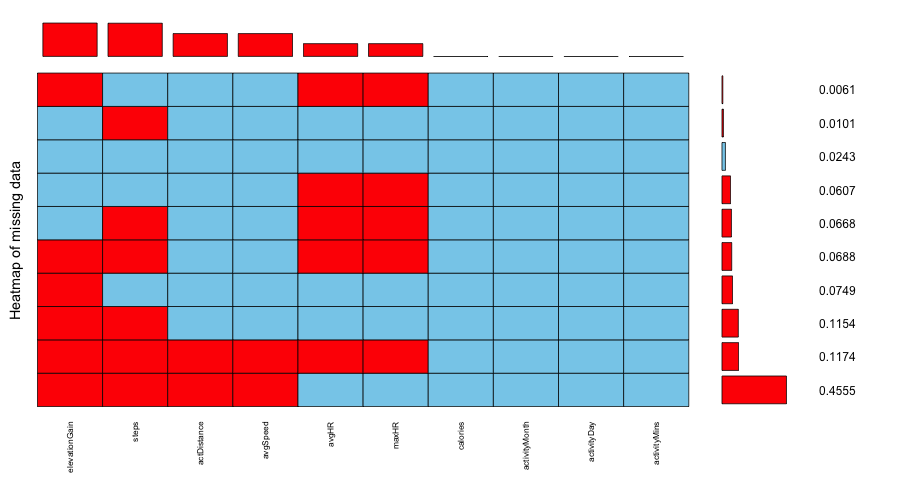

In [182]:
%%R -i running_data_continuous -w 900 -h 480 -u px

library(vcd)
library(dplyr)
library(grid) # for gpar
library(RColorBrewer)
library("VIM")
library("mice")
library(lattice)

aggr_plot <- aggr(running_data_continuous, col=c('skyblue','red'), numbers=TRUE, sortVars=TRUE, labels=names(running_data_continuous), cex.axis=.7, gap=3, ylab=c("Heatmap of missing data"), combined= TRUE)
rm(list = ls())

** Looking at the above visualization, the following patterns emerge: **

1. Average Heart Rate and Maximum Heart Rate values are missing for those specific Activities when I was using a fitness tracker which did not have Heart Rate Tracking ability.
2. The statistics like Elevation Gain were tracked when I was using a heart rate strap attached, which being lazy I didn't use often, leading to the highest number of missing values, because of which we will **not consider it as an important feature in our analysis.**
3. For the first generation fitness tracker used like Garmin Vivofit 1 and 2, even though it had capabilities to record my Running Distance based on the number of steps take, it still did not process the other metrics like Average Speed and Heart rate values.
4. Also, the Running Distance values are missing for all workouts which involved Strength Training. *If there was some recorded value for this field during Strength Training sessions due to the number of steps taken, it has been ignored and replaced with NaNs in my analysis.*
5. Steps were recorded by the most recent fitness trackers used and therefore have a lot of missing values. During activities not involving Running, the Steps have not been considered and replaced with NaNs.

** From the above analysis, it can be seen that the most important features for further analysis are `Activity Minutes`, `Activity Month`, `Activity Day`, `Calories Burnt`, `Average Heart Rate`, `Maximum Heart Rate`, `Activity Distance Covered`. The other features, specifically, `Average Speed` , `Steps` and `Elevation Gain` have a higher number of missing values and will not be considered important for future analysis, even though `Average Speed` and `Steps` can help me analyze the runs and find some correlations. **


## Univariate Data Analysis and Visualizations

** In this section, we will analyze the identified important features through our missing data analysis, namely, `Activity Minutes`, `Activity Month`, `Activity Day` and `Calories Burnt`. **

### Feature : Activity Minutes 

** *i. Distribution Histogram with overlayed Density Plots, with varying binwidths also* **

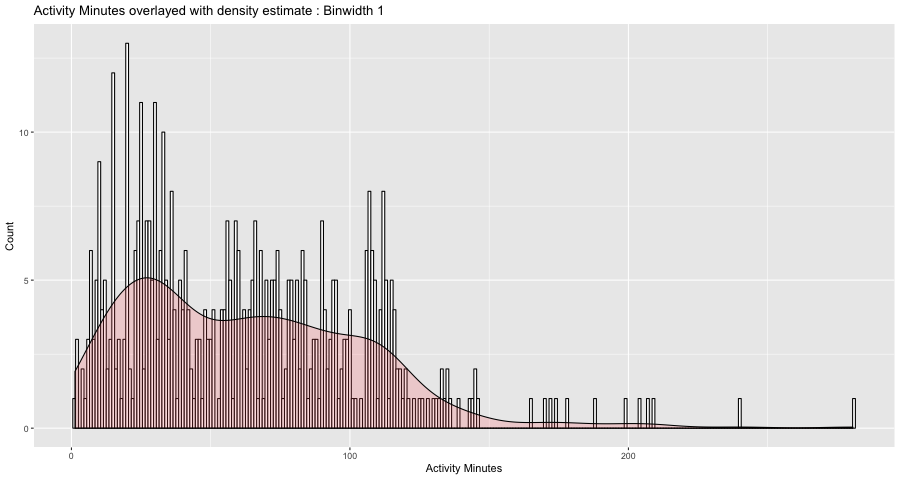

In [183]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

ggplot(running_data, aes(x=activityMins)) + 
    geom_histogram(aes(y=..count..),      # Histogram with density instead of count on y-axis
                   binwidth=1,
                   colour="black", fill="white") +
    geom_density(aes(y=..count..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Count") +
    xlab("Activity Minutes") +
    ggtitle("Activity Minutes overlayed with density estimate : Binwidth 1") 

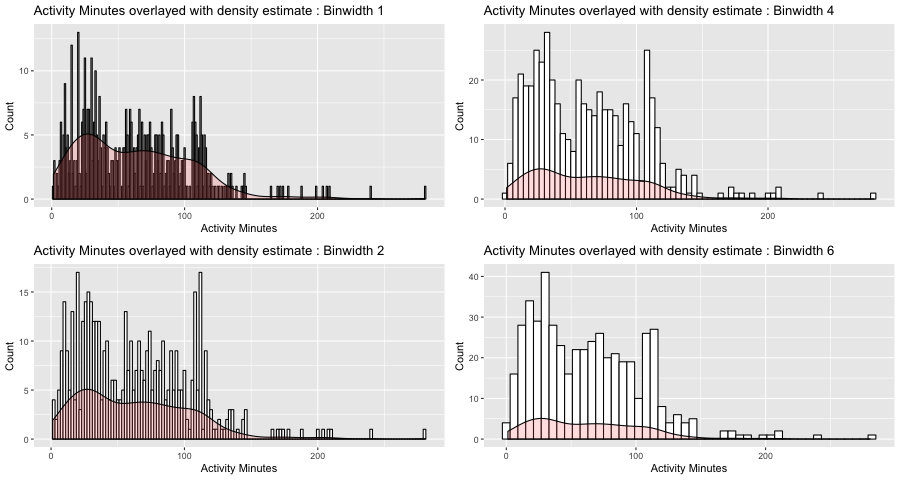

In [184]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}
g1 <- ggplot(running_data, aes(x=activityMins)) + 
    geom_histogram(aes(y=..count..),      # Histogram with density instead of count on y-axis
                   binwidth=1,
                   colour="black", fill="white") +
    geom_density(aes(y=..count..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Count") +
    xlab("Activity Minutes") +
    ggtitle("Activity Minutes overlayed with density estimate : Binwidth 1")

g2 <- ggplot(running_data, aes(x=activityMins)) + 
    geom_histogram(aes(y=..count..),      # Histogram with density instead of count on y-axis
                   binwidth=2,
                   colour="black", fill="white") +
    geom_density(aes(y=..count..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Count") +
    xlab("Activity Minutes") +
    ggtitle("Activity Minutes overlayed with density estimate : Binwidth 2")

g3 <- ggplot(running_data, aes(x=activityMins)) + 
    geom_histogram(aes(y=..count..),      # Histogram with density instead of count on y-axis
                   binwidth=4,
                   colour="black", fill="white") +
    geom_density(aes(y=..count..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Count") +
    xlab("Activity Minutes") +
    ggtitle("Activity Minutes overlayed with density estimate : Binwidth 4")

g4 <- ggplot(running_data, aes(x=activityMins)) + 
    geom_histogram(aes(y=..count..),      # Histogram with density instead of count on y-axis
                   binwidth=6,
                   colour="black", fill="white") +
    geom_density(aes(y=..count..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Count") +
    xlab("Activity Minutes") +
    ggtitle("Activity Minutes overlayed with density estimate : Binwidth 6")

multiplot(g1, g2, g3, g4, cols=2)

** Analysis of the above visualization: **

1. In the plot above, we see a distribution of Activity Minutes on the x-axis along with the count of those activities on the y-axis.
2. The Distribution is clearly multi-model skewed towards the right. Varying the binwidths also led to similar distributions showing the underlying pattern of the distribution.
3. Reasons for skewness include the practice runs while I was training for my first full Marathon in 2016, the full marathon and also instances when I forgot to stop the timer while recording activities.

** *ii. Distribution of Activity Times across various Activities* **

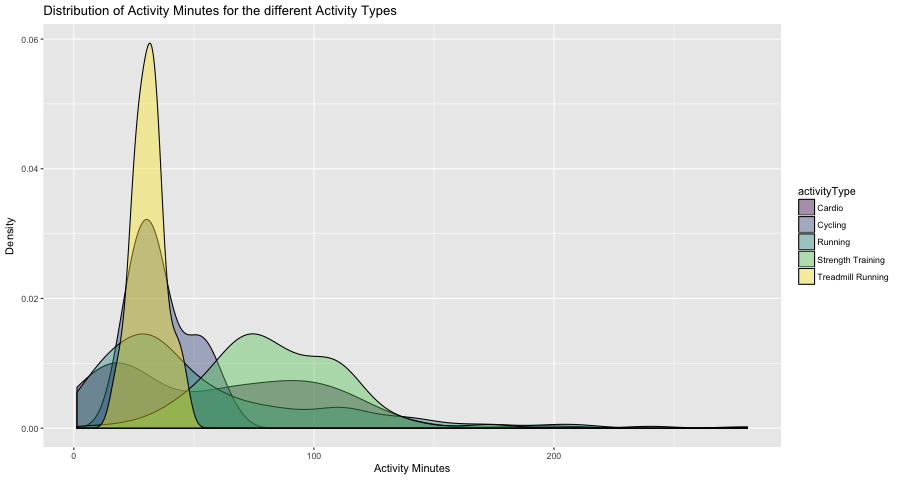

In [185]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")
require("viridis")

g1 <- ggplot(running_data, aes(x=activityMins, fill=activityType)) + 
    geom_density(alpha=0.4, adjust = 1, na.rm = TRUE) +   # Overlay with transparent density plot
    ylab("Density") +
    xlab("Activity Minutes") + scale_fill_viridis(discrete=TRUE) +
    ggtitle("Distribution of Activity Minutes for the different Activity Types")
g1

** Analysis of the above visualization: **

1. In the plot above, we see a distribution of Activity Minutes on the x-axis along with the density of those activities on the y-axis for all the activity Types.
2. The Distributions are nearly normal or skewed towards the right, which is a nice observation and helps me understand the usual minutes I spend doing a particular activity type.

** *iii. Analysis of Outliers for Activity Times* **

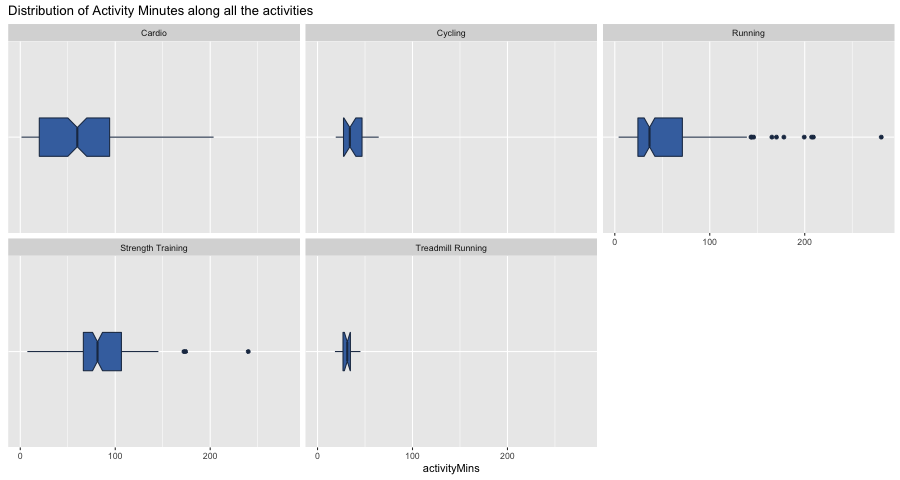

In [186]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

fill <- "#4271AE"
line <- "#1F3552"

ggplot(running_data, aes(x=factor(1), y=activityMins)) + geom_boxplot(fill = fill, colour = line, notch = TRUE, width=0.2) +
    guides(fill=FALSE) + coord_flip() + 
    theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) +
    ggtitle("Distribution of Activity Minutes along all the activities") + facet_wrap( ~ activityType)

** Analysis of the above visualization: **

1. In the plot above, we want to analyze the outliers for each Activity Type of the total Activity Minutes.
2. The outliers in the right direction bring a smile to my face, as possibly those are the days I pushed myself and I don't want to comment on the outliers on the left side. The boxplots do help me understand the usual time zones doing a particular activity clearly.

### Feature : Activity Month

** *i. How many total activities have I done in every month for the past 5 years?* **

In [187]:
running_data_gMonth = running_data.groupby("activityMonthName").count()
running_data_gMonth = running_data_gMonth[["activityMonth"]]
running_data_gMonth.reset_index(inplace=True)
running_data_gMonth.rename(columns={'activityMonth':'Count'}, inplace=True)
# running_data_gMonth

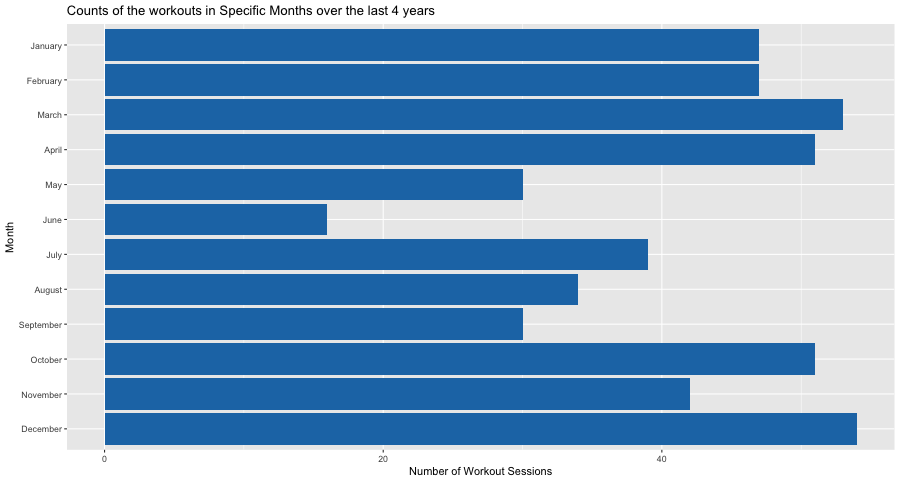

In [188]:
%%R -i running_data_gMonth -w 900 -h 480 -u px

require("ggplot2")
require("viridis")

orderedclasses <- c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
running_data_gMonth$activityMonthName <- factor(running_data_gMonth$activityMonthName, levels = rev(orderedclasses))

ggplot(running_data_gMonth, aes(x = activityMonthName, y = Count)) + 
  geom_col(fill = "#1f77b4") + 
  coord_flip() +
  theme(legend.position="none") +
  xlab("Month") +
  ylab("Number of Workout Sessions") + 
  ggtitle("Counts of the workouts in Specific Months over the last 4 years")

** Analysis of the above visualization: **

1. In the plot above, I am showing the total number of workouts done in every month.
2. Okay, I will admit, this was an eye opener for me. I thought I have been regular to the gym, but the plot shows something different. The difference between the numbers can also be accounted for not tracking the specific workout sessions other than running for the years 2012-2014.
3. In the last 2 years, I have been tracking all my running workouts and the gym sessions and am happy that for some months atleast the number of workouts in the last 2-3 years did touch values greater 50, i.e., March, October and December specifically - probably the onset of Spring Season and the running season.

** *ii. How many specific activities have I done in every month for the past 5 years?* **

In [189]:
running_data["activityYear"] = running_data.startTime.dt.year

In [190]:
running_data_gMonth = running_data.groupby(["activityYear", "activityMonthName", "activityType"]).count()

In [191]:
running_data_gMonth = running_data_gMonth[["activityMonth"]]
running_data_gMonth.reset_index(inplace=True)
running_data_gMonth.rename(columns={'activityMonth':'Count'}, inplace=True)

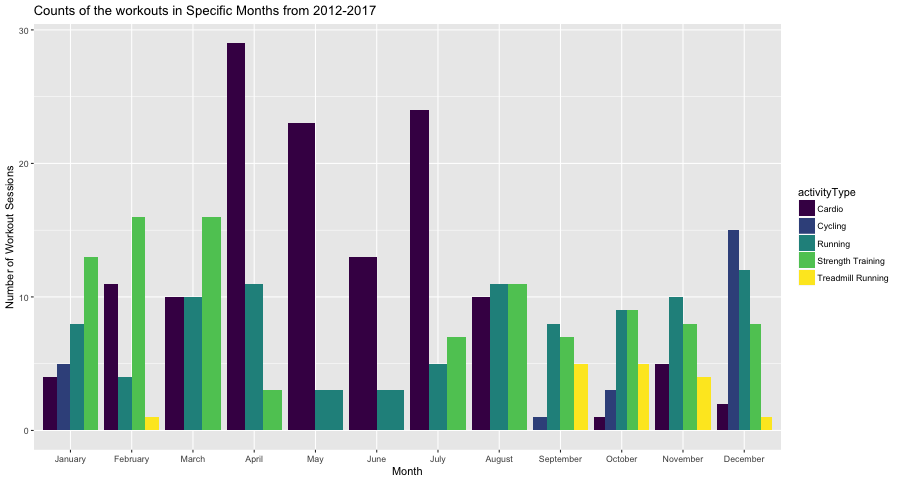

In [192]:
%%R -i running_data_gMonth -w 900 -h 480 -u px

require("ggplot2")
require("viridis")

orderedclasses <- c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
running_data_gMonth$activityMonthName <- factor(running_data_gMonth$activityMonthName, levels = orderedclasses)

ggplot(running_data_gMonth, aes(x = activityMonthName, y = Count, fill = activityType)) + 
  geom_col(position="dodge") + 
  xlab("Month") +
  ylab("Number of Workout Sessions") +
  ggtitle("Counts of the workouts in Specific Months from 2012-2017") + scale_fill_viridis(discrete=TRUE)

** Analysis of the above visualization: **

1. In the plot above, I am showing the total number of workouts done in every month for every activity type.
2. Some interesting facts come out of this analysis:
   * I am not tracked a strength training session for the Months of June and July, which makes it clear that I bought a device with that capability in 2016 around July and started capturing the strength sessions after that.
   * Cardio sessions are high during the summer season as compared to August - December which is the running season. 
   * Cycling sessions are few and indicate to citibike rides in NY after coming here in August 2016.

** *iii. Faceted by Year of the activity* **

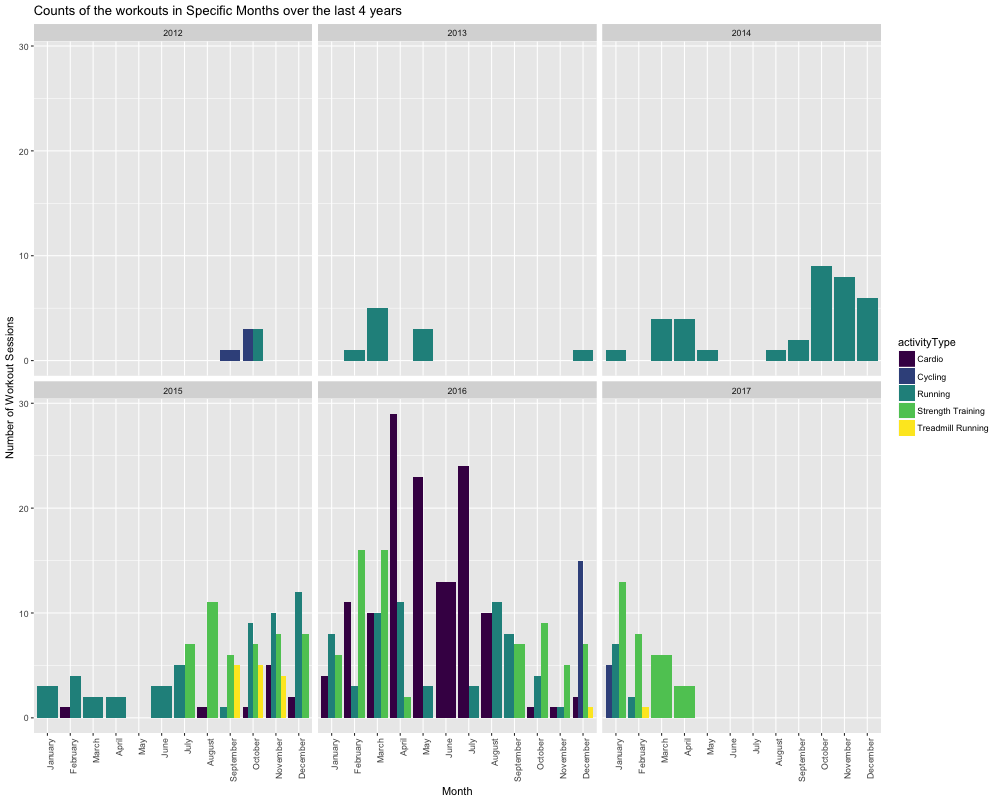

In [193]:
%%R -i running_data_gMonth -w 1000 -h 800 -u px

require("ggplot2")
require("viridis")


orderedclasses <- c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
running_data_gMonth$activityMonthName <- factor(running_data_gMonth$activityMonthName, levels = orderedclasses)

ggplot(running_data_gMonth, aes(x = activityMonthName, y = Count, fill = activityType)) + 
  geom_col(position="dodge") + facet_wrap(~ activityYear) +
  xlab("Month") + 
  ylab("Number of Workout Sessions") +
  ggtitle("Counts of the workouts in Specific Months over the last 4 years") + scale_fill_viridis(discrete=TRUE) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

## TODO

** Analysis of the above visualization: **

1. In the plot above, I am showing the total number of workouts done in every month for every activity type faceted by Years.
2. I will write about every year and see how the journey has evolved,
    * 2012 - Got into fitness

### Feature : Activity Day

** *i. Which activities on which day of the week?* **

In [194]:
running_data_activDay = running_data.groupby(["activityDayName", "activityType"])[['activityDay']].count()
running_data_activDay.rename(columns={'activityDay':'Count'}, inplace=True)
running_data_activDay.reset_index(inplace=True)
#running_data_activDay

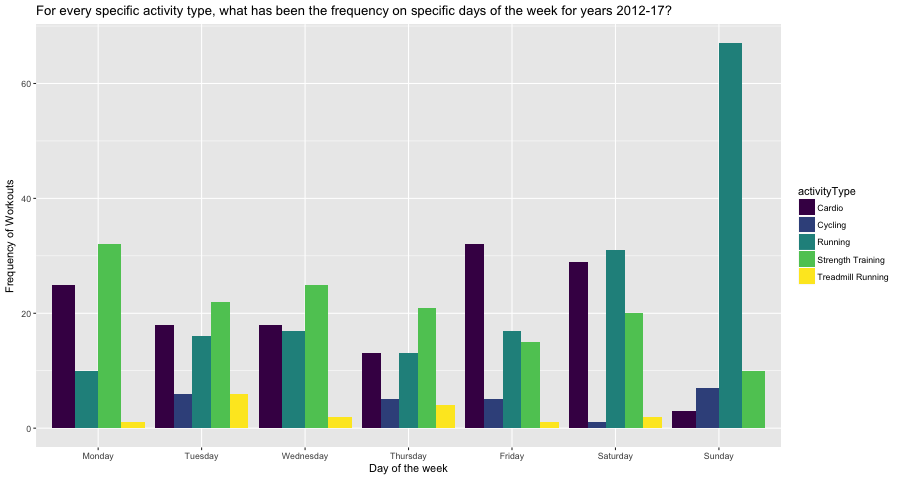

In [195]:
%%R -i running_data_activDay -w 900 -h 480 -u px

library(tidyverse)
library(ggplot2)
library(gridExtra)
require("viridis")

orderedclasses <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
running_data_activDay$activityDayName <- factor(running_data_activDay$activityDayName, levels = orderedclasses)


g1 <- ggplot(running_data_activDay, aes(x = activityDayName, y = Count, fill=activityType)) +
  geom_col(position = "dodge") +  scale_fill_viridis(discrete=TRUE) + 
  xlab("Day of the week") +
  ylab("Frequency of Workouts") +
  ggtitle("For every specific activity type, what has been the frequency on specific days of the week for years 2012-17?")
g1

** *ii. Which activities on which day of the week, faceted by activity?* **

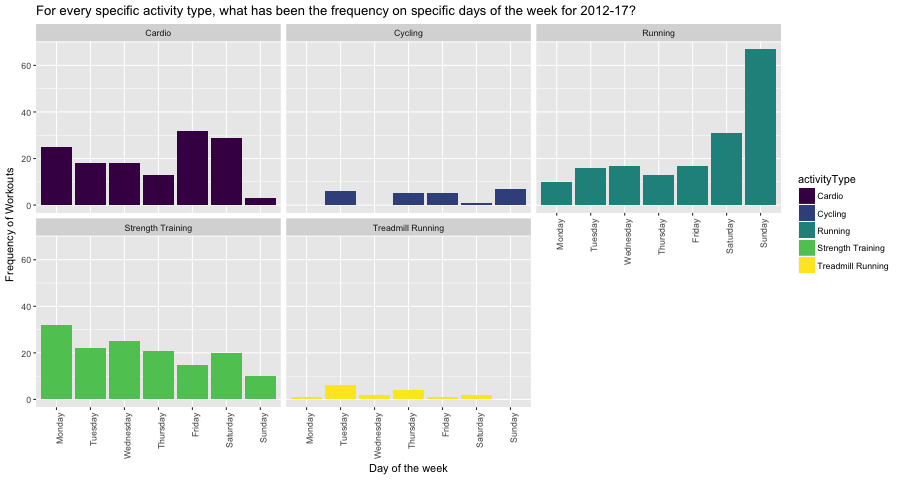

In [196]:
%%R -i running_data_activDay -w 900 -h 480 -u px

orderedclasses <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
running_data_activDay$activityDayName <- factor(running_data_activDay$activityDayName, levels = orderedclasses)

g2 <- ggplot(running_data_activDay, aes(x = activityDayName, y = Count, fill=activityType)) +
  geom_col() + facet_wrap(~activityType) + scale_fill_viridis(discrete=TRUE) +
  xlab("Day of the week") +
  ylab("Frequency of Workouts") + theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ggtitle("For every specific activity type, what has been the frequency on specific days of the week for 2012-17?")
g2

** Analysis of the above visualizations: **

1. In the plots above, I am showing the total number of workouts done on a specific day of the week over the last 5 years of tracked workouts.
2. The obvious patterns from the plots are as follows:
    * The strength training sessions are evenly distributed over all the days of the week except for Sundays (rest day/running day).
    * The running count increases as I go into the week with the highest running frequency on the weekends.
    * The number of cardio and treadmill running sessions are few as compared to the other workouts but they are mostly evenly distributed throughout the week.
    * Cycling sessions have been tracked only since I moved to NY in September 2016, and are few and mostly during the end of the week (Wednesday - Sunday).

### Feature : Calories Burnt 

** *i. Distribution Histogram with overlayed Density Plots* **

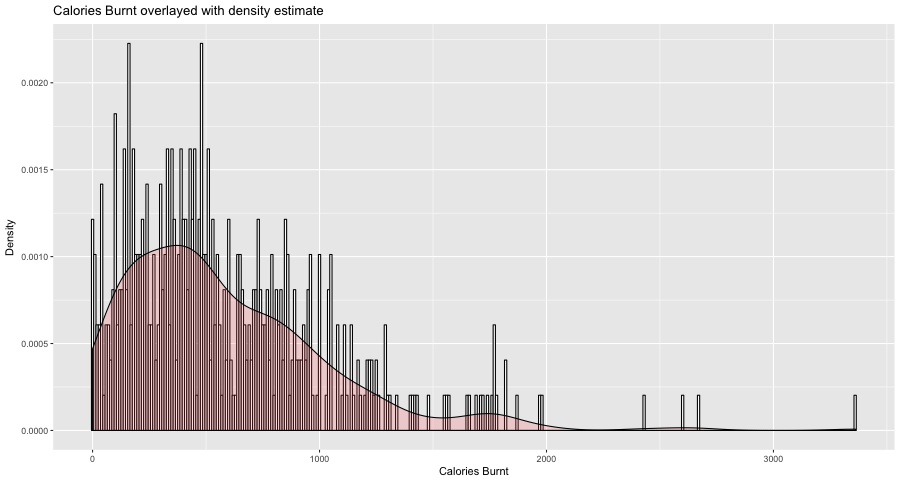

In [197]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

ggplot(running_data, aes(x=calories)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=10,
                   colour="black", fill="white") +
    geom_density(aes(y=..density..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Density") +
    xlab("Calories Burnt") +
    ggtitle("Calories Burnt overlayed with density estimate")

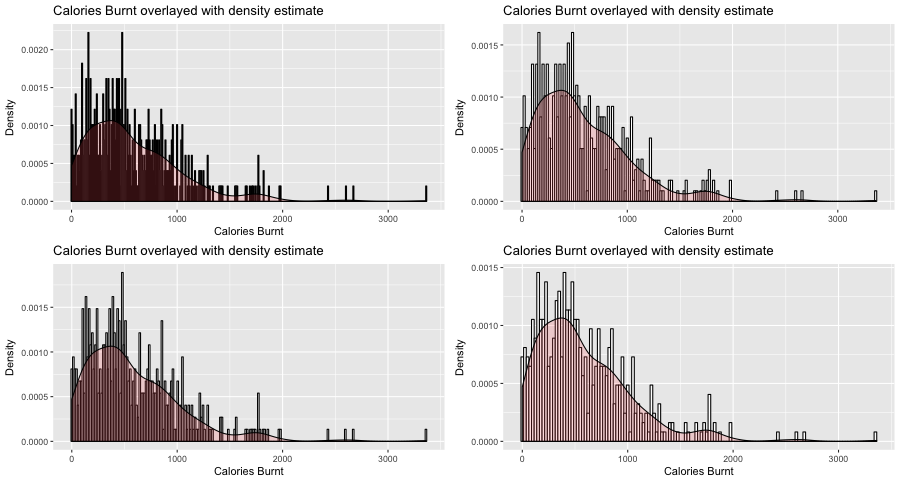

In [198]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

g1 <- ggplot(running_data, aes(x=calories)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=10,
                   colour="black", fill="white") +
    geom_density(aes(y=..density..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Density") +
    xlab("Calories Burnt") +
    ggtitle("Calories Burnt overlayed with density estimate")

g2 <- ggplot(running_data, aes(x=calories)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=15,
                   colour="black", fill="white") +
    geom_density(aes(y=..density..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Density") +
    xlab("Calories Burnt") +
    ggtitle("Calories Burnt overlayed with density estimate")

g3 <- ggplot(running_data, aes(x=calories)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=20,
                   colour="black", fill="white") +
    geom_density(aes(y=..density..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Density") +
    xlab("Calories Burnt") +
    ggtitle("Calories Burnt overlayed with density estimate")

g4 <- ggplot(running_data, aes(x=calories)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=25,
                   colour="black", fill="white") +
    geom_density(aes(y=..density..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Density") +
    xlab("Calories Burnt") +
    ggtitle("Calories Burnt overlayed with density estimate")

multiplot(g1, g2, g3, g4, cols=2)

** Analysis of the above visualizations: **

1. In the plot above, we see a distribution of Calories burnt on the x-axis along with their frequency and densities plotted.
2. The Distribution is clearly normal and multi-modal skewed towards the right, which can be understood as the practice runs while I was training for my first full Marathon in 2016 had the highest amount of calories burnt, with the marathon having more than 3000 calories burnt in a workout. 
3. Also, the normal workout session involved around 400-500 calories, which has the highest count and am happy to see a lot of workouts also in the range of 1000 and above calories burnt.
4. Varying the binwidth also shows similar underlying distribution for the calories burnt.

** *ii. Distribution of Calories Burnt across various Activities* **

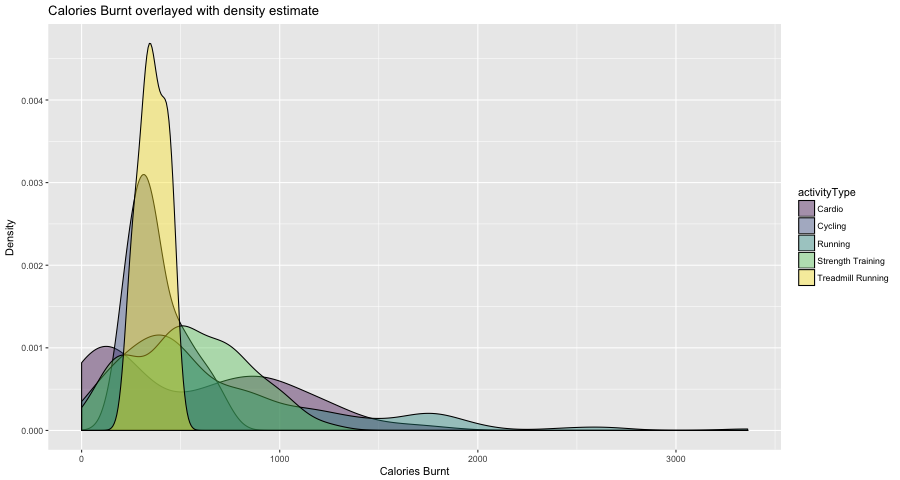

In [199]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")
require("viridis")

g1 <- ggplot(running_data, aes(x=calories, fill=activityType)) + 
    geom_density(alpha=0.4, adjust = 1, na.rm = TRUE) +   # Overlay with transparent density plot
    ylab("Density") + scale_fill_viridis(discrete=TRUE) +
    xlab("Calories Burnt") +
    ggtitle("Calories Burnt overlayed with density estimate")
g1

** Analysis of the above visualization: **

1. In the plot above, we see a distribution of Calories Burnt on the x-axis along with the density of those activities on the y-axis for all the activity Types.
2. The Distributions are nearly normal or skewed towards the right, which is a nice observation and helps me understand the usual calories burnt doing a particular activity.

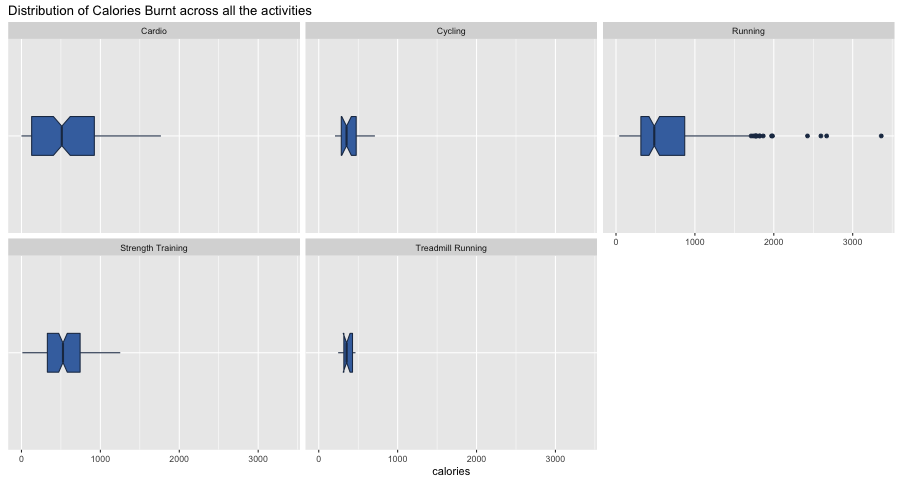

In [200]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

fill <- "#4271AE"
line <- "#1F3552"

ggplot(running_data, aes(x=factor(1), y=calories)) + geom_boxplot(fill = fill, colour = line, notch = TRUE, width=0.2) +
    guides(fill=FALSE) + coord_flip() + 
    theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) +
    ggtitle("Distribution of Calories Burnt across all the activities") + facet_wrap( ~ activityType)

** Analysis of the above visualization: **

1. In the plot above, we want to analyze the outliers for each Activity Type of the total Calories Burnt.
2. The outliers in the right direction bring a smile to my face, as possibly those are the days I pushed myself and I don't want to comment on the outliers on the left side. The boxplots do help me understand the usual calories doing a particular activity clearly.
3. Some of the observations which are worth highlighting are as follows: 
    * Strength Training sessions had no outliers and had a maximum of around 1800 calories burnt in a session.
    * Treadmill Running, even though are small in number but usually for a session did lead to around 500 calores burnt.
    * Running had the outliers in the right directions, which are all the practice runs leading upto the Full Marathon as well as the full Marathon.
    * Cycling sessions were mostly around 30 minutes in length, duration of Citibike rental and led to about similar calories burn and vary within a small range without significant outliers.

## Multivariate Data Analysis

### Scatterplot Matrix for continuous features

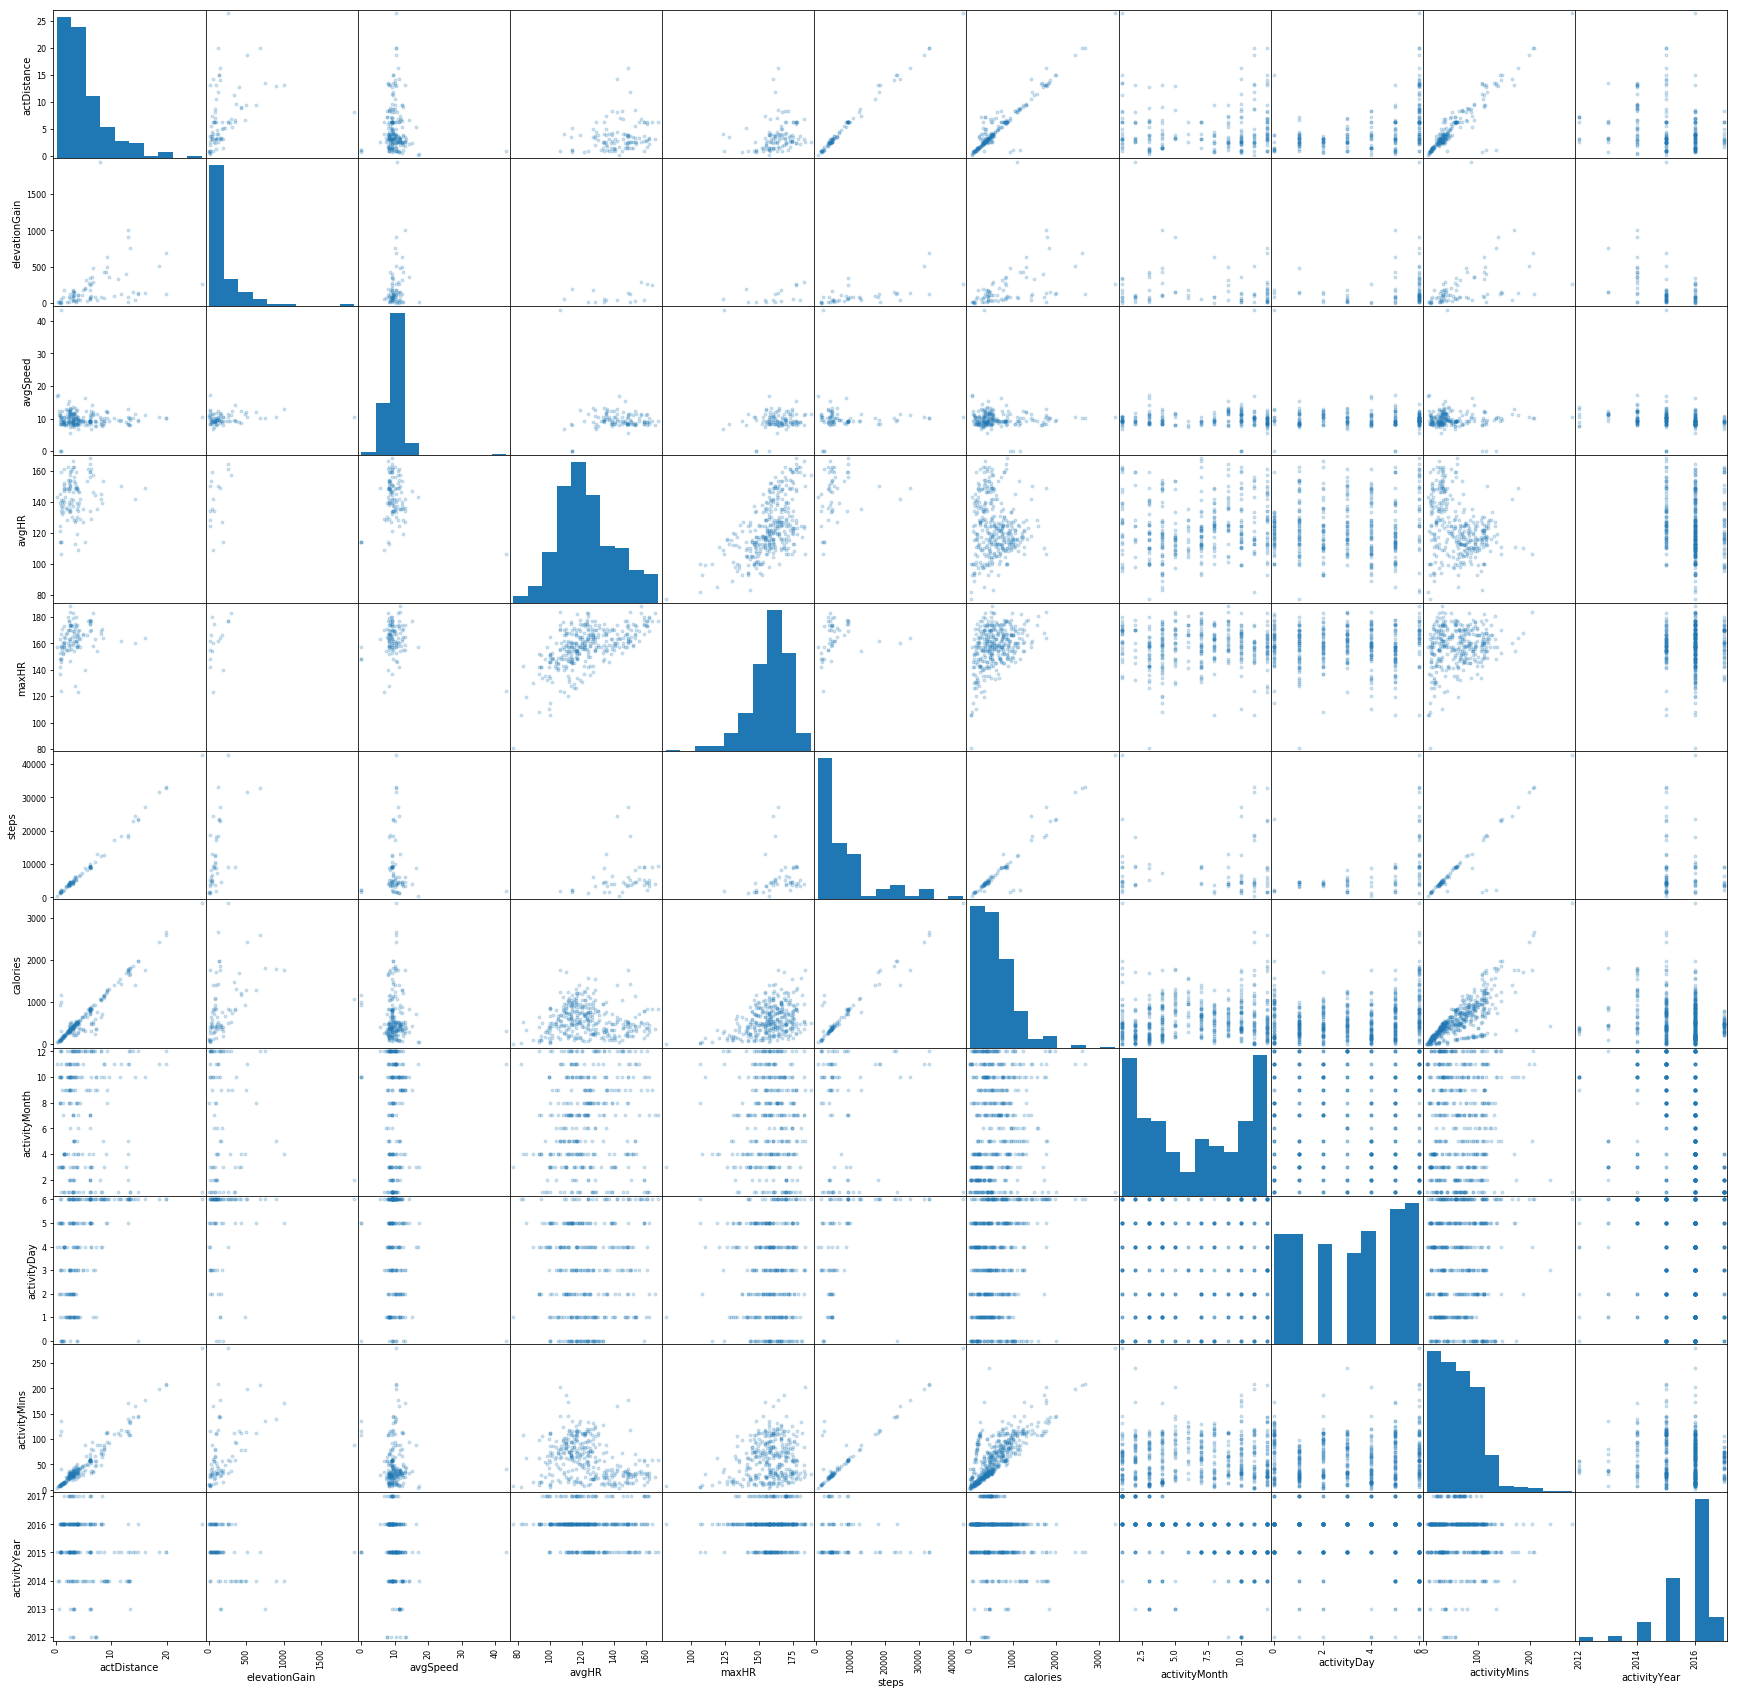

In [201]:
_ = pd.scatter_matrix(running_data, alpha=0.2, figsize=(30, 30))

** Analysis of the above visualization: **

A Scatterplot matrices is a great way to roughly determine if you have a linear correlation between multiple variables. This is particularly helpful in pinpointing specific variables that might have similar correlations amongst the dataset. Some observations are as follows:

* Calories burnt show approximately linear correlation with the minutes of a particular activity and the steps taken. 
* Heteroskedasticity is observed for variables calories with activity Minutes and also activityMins and elevationGain.

## Observing Trends from the Data 

### Yearwise Analysis - Activity Mins, Calories Burnt, Miles Run

i. Total Calories Burnt for years

<Container object of 6 artists>

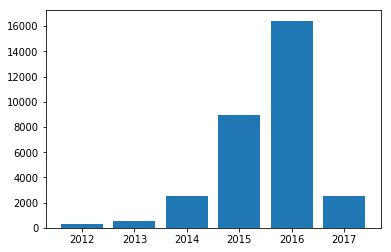

In [202]:
## Activity Minute for every Year that has been recorded, histogram

output = running_data.groupby("activityYear").activityMins.agg({"Sum" : "sum"})
output.reset_index(inplace=True)
output
plt.bar(output.activityYear, output.Sum)
#plt.plot(output)


<Container object of 6 artists>

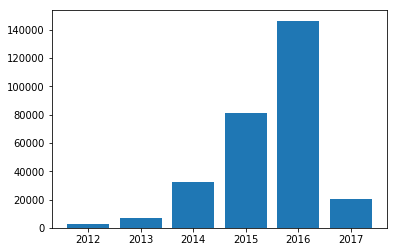

In [203]:
## Total calories burnt during activities for years 2012-17

output = running_data.groupby("activityYear").calories.agg({"Sum" : "sum"})
output.reset_index(inplace=True)
output
plt.bar(output.activityYear, output.Sum)

<Container object of 6 artists>

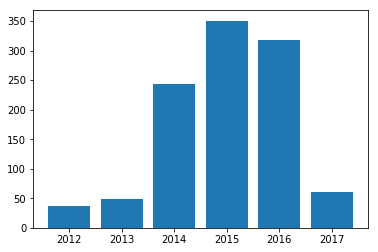

In [204]:
## Total Distance Run for every year

output = running_data.groupby("activityYear").actDistance.agg({"Sum" : "sum"})
output.reset_index(inplace=True)
output
plt.bar(output.activityYear, output.Sum)

In [205]:
## For every year, for every month, the total number of activity Mins - Time Series

running_data.groupby(["activityYear", "activityMonth"]).activityMins.agg(["sum"])

sum
activityYear activityMonth         
2012         9                55.51
             10              255.14
2013         2                56.55
             3               223.19
             5               113.07
             12              135.26
2014         1               131.23
             3               293.24
             4               416.72
             5               139.09
             8               112.54
             9               179.47
             10              400.56
             11              453.16
             12              398.90
2015         1               233.78
             2               205.08
             3                43.41
             4                72.53
             6               109.89
             7               875.71
             8              1237.22
             9               842.27
             10             1907.78
             11             1821.30
             12             1620.60
2016         1              1276.97
             2              2250.89
             3              1672.03
             4              2237.24
             5              2067.82
             6              1254.89
             7              1756.95
             8               792.36
             9               720.09
             10              962.91
             11              400.62
             12             1035.37
2017         1              1311.65
             2               650.28
             3               331.59
             4               195.59

### Also, total minutes of every activity for the years - Time Series

In [206]:
running_data.groupby(["activityYear", "activityMonth", "activityType"]).activityMins.agg(["sum"])

sum
activityYear activityMonth activityType              
2012         9             Cycling              55.51
             10            Cycling             141.22
                           Running             113.92
2013         2             Running              56.55
             3             Running             223.19
             5             Running             113.07
             12            Running             135.26
2014         1             Running             131.23
             3             Running             293.24
             4             Running             416.72
             5             Running             139.09
             8             Running             112.54
             9             Running             179.47
             10            Running             400.56
             11            Running             453.16
             12            Running             398.90
2015         1             Running             233.78
             2             Cardio               20.00
                           Running             185.08
             3             Running              43.41
             4             Running              72.53
             6             Running             109.89
             7             Running             226.23
                           Strength Training   649.48
             8             Cardio                5.50
                           Strength Training  1231.72
             9             Running              88.19
                           Strength Training   590.39
                           Treadmill Running   163.69
             10            Cardio               30.16
                           Running             875.32
                           Strength Training   844.01
                           Treadmill Running   158.29
             11            Cardio               54.23
                           Running             861.55
                           Strength Training   779.46
                           Treadmill Running   126.06
             12            Cardio               50.47
                           Running             779.82
                           Strength Training   790.31
2016         1             Cardio              116.42
                           Running             698.28
                           Strength Training   462.27
             2             Cardio              337.28
                           Running             199.17
                           Strength Training  1714.44
             3             Cardio              161.04
                           Running             303.27
                           Strength Training  1207.72
             4             Cardio             1819.20
                           Running             230.27
                           Strength Training   187.77
             5             Cardio             1939.47
                           Running             128.35
             6             Cardio             1254.89
             7             Cardio             1676.18
                           Running              80.77
             8             Cardio              538.11
                           Running             254.25
             9             Running             260.56
                           Strength Training   459.53
             10            Cardio              187.54
                           Running             153.79
                           Strength Training   621.58
             11            Cardio                4.28
                           Running              42.18
                           Strength Training   354.16
             12            Cardio               31.32
                           Cycling             495.45
                           Strength Training   483.14
                           Treadmill Running    25.46
2017         1             Cycling             188.12
                           Running             212.06


In [207]:
running_data.groupby(["activityYear", "activityMonth", "activityType"]).activityMins.agg(["sum"])

sum
activityYear activityMonth activityType              
2012         9             Cycling              55.51
             10            Cycling             141.22
                           Running             113.92
2013         2             Running              56.55
             3             Running             223.19
             5             Running             113.07
             12            Running             135.26
2014         1             Running             131.23
             3             Running             293.24
             4             Running             416.72
             5             Running             139.09
             8             Running             112.54
             9             Running             179.47
             10            Running             400.56
             11            Running             453.16
             12            Running             398.90
2015         1             Running             233.78
             2             Cardio               20.00
                           Running             185.08
             3             Running              43.41
             4             Running              72.53
             6             Running             109.89
             7             Running             226.23
                           Strength Training   649.48
             8             Cardio                5.50
                           Strength Training  1231.72
             9             Running              88.19
                           Strength Training   590.39
                           Treadmill Running   163.69
             10            Cardio               30.16
                           Running             875.32
                           Strength Training   844.01
                           Treadmill Running   158.29
             11            Cardio               54.23
                           Running             861.55
                           Strength Training   779.46
                           Treadmill Running   126.06
             12            Cardio               50.47
                           Running             779.82
                           Strength Training   790.31
2016         1             Cardio              116.42
                           Running             698.28
                           Strength Training   462.27
             2             Cardio              337.28
                           Running             199.17
                           Strength Training  1714.44
             3             Cardio              161.04
                           Running             303.27
                           Strength Training  1207.72
             4             Cardio             1819.20
                           Running             230.27
                           Strength Training   187.77
             5             Cardio             1939.47
                           Running             128.35
             6             Cardio             1254.89
             7             Cardio             1676.18
                           Running              80.77
             8             Cardio              538.11
                           Running             254.25
             9             Running             260.56
                           Strength Training   459.53
             10            Cardio              187.54
                           Running             153.79
                           Strength Training   621.58
             11            Cardio                4.28
                           Running              42.18
                           Strength Training   354.16
             12            Cardio               31.32
                           Cycling             495.45
                           Strength Training   483.14
                           Treadmill Running    25.46
2017         1             Cycling             188.12
                           Running             212.06


### Time Series for all the Activities? shown in ggplot lecture, try using gganimate

In [208]:
running_data.groupby(["activityYear", "activityMonth"]).activityMins.agg(["sum"])

sum
activityYear activityMonth         
2012         9                55.51
             10              255.14
2013         2                56.55
             3               223.19
             5               113.07
             12              135.26
2014         1               131.23
             3               293.24
             4               416.72
             5               139.09
             8               112.54
             9               179.47
             10              400.56
             11              453.16
             12              398.90
2015         1               233.78
             2               205.08
             3                43.41
             4                72.53
             6               109.89
             7               875.71
             8              1237.22
             9               842.27
             10             1907.78
             11             1821.30
             12             1620.60
2016         1              1276.97
             2              2250.89
             3              1672.03
             4              2237.24
             5              2067.82
             6              1254.89
             7              1756.95
             8               792.36
             9               720.09
             10              962.91
             11              400.62
             12             1035.37
2017         1              1311.65
             2               650.28
             3               331.59
             4               195.59

### Total Calories Burnt doing the activities ? Put D3 Visualization

### Activities Done for the years 2012-2017 vs the time of the day? Put D3 visualization

### For every month of every year (2012-2016), what was the running mileage? Put D3 visualization

### Analysis of Long Distance Runs (> 15 kms)

### Mosaic Plots showing Patterns from the data.

### HeatMaps

### Conclusion

---

---